## Exploratory Data Analysis in Python

## Chapter 01
#### ¿What are the average birth weight of babies in the United States?

__Dataset__

** National Survey of Family Growth

NSFG data, from the National Center for Health Statistics

"information on family life,
marriage and divorce,
pregnancy, infertility, use of
contraception, and general
and reproductive health.
"

In [83]:
!pip3 install empiricaldist

  Created wheel for empiricaldist: filename=empiricaldist-0.6.0-py3-none-any.whl size=10357 sha256=dc8a2a289e8fa8170a9fb1962b277d9388ab2af7c245953b477001e81945f30e
  Stored in directory: c:\users\dell user\appdata\local\pip\cache\wheels\17\e3\18\fcab52381301fe12fa5f6fadfdd2d9bebb85496910b3903199
Successfully built empiricaldist


#### Reading the data

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
os.getcwd()

'C:\\Users\\DELL USER\\GithubProjects\\DataScienceProjects\\Exploratory Data Analysis in Python'

In [3]:
file = 'nsfg.hdf5'
dir = '.\\datasets\\' + file

In [4]:
print(dir)

.\datasets\nsfg.hdf5


In [5]:
nsfg = pd.read_hdf(dir ,'nsfg')

#### Exploring the NSFG data <br>
Calculate the number of rows and columns in the DataFrame nsfg.

In [6]:
# Display the number of rows and columns
print(nsfg.shape)
print()
# Display the names of the columns
print(nsfg.columns)
print()
# Select column birthwgt_oz1: ounces
ounces = nsfg['birthwgt_oz1']
print()
# Print the first 5 elements of ounces
print(ounces.head())

(9358, 10)

Index(['caseid', 'outcome', 'birthwgt_lb1', 'birthwgt_oz1', 'prglngth',
       'nbrnaliv', 'agecon', 'agepreg', 'hpagelb', 'wgt2013_2015'],
      dtype='object')


0     4.0
1    12.0
2     4.0
3     NaN
4    13.0
Name: birthwgt_oz1, dtype: float64


#### Clean and Validate


##### Validate a variable

In the NSFG dataset, the variable 'outcome' encodes the outcome of each pregnancy as shown below:
 * Label 1 	Live birth
 * Label 2 	Induced abortion
 * Label 3  Stillbirth
 * Label 4 	Miscarriage
 * Label 5 	Ectopic pregnancy
 * Label 5 	Current pregnancy

How many pregnancies in this dataset ended with a live birth?

In [7]:
nsfg['outcome'].value_counts().sort_index()

1    6489
2     947
3      86
4    1469
5     118
6     249
Name: outcome, dtype: int64

Answer: 6489

In the NSFG dataset, the variable 'nbrnaliv' records the number of babies born alive at the end of a pregnancy.

If you use .value_counts() to view the responses, you'll see that the value 8 appears once, and if you consult the codebook, you'll see that this value indicates that the respondent refused to answer the question.

Your job in this exercise is to replace this value with np.nan

In [8]:
# Replace the value 8 with NaN
nsfg['nbrnaliv'].replace(8, np.nan, inplace = True)

# Print the values and their frequencies
print(nsfg['nbrnaliv'].value_counts())

1.0    6379
2.0     100
3.0       5
Name: nbrnaliv, dtype: int64


##### Compute a variable

For each pregnancy in the NSFG dataset, the variable 'agecon' encodes the respondent's age at conception, and 'agepreg' the respondent's age at the end of the pregnancy.

* Select 'agecon' and 'agepreg', divide them by 100, and assign them to the local variables agecon and agepreg.

In [9]:
# Select the columns and divide by 100
agecon = nsfg['agecon']/100
agepreg = nsfg['agepreg']/100

* Compute the difference, which is an estimate of the duration of the pregnancy. Keep in mind that for each pregnancy, agepreg will be larger than agecon.

In [10]:
preg_length = agepreg  - agecon

* Use .describe() to compute the mean duration and other summary statistics.

In [11]:
# Compute summary statistics
print(preg_length.describe())

count    9109.000000
mean        0.552069
std         0.271479
min         0.000000
25%         0.250000
50%         0.670000
75%         0.750000
max         0.920000
dtype: float64


#### Filter and visualize

#### Make a histogram

Histograms are one of the most useful tools in exploratory data analysis. They quickly give you an overview of the distribution of a variable, that is, what values the variable can have, and how many times each value appears.

* Plot a histogram of agecon with 20 bins.

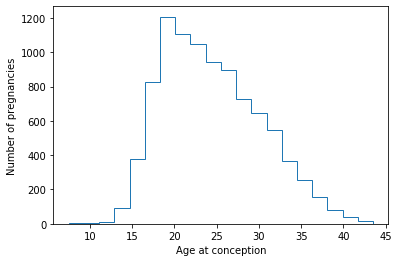

In [12]:
# Plot the histogram
plt.hist(agecon, bins=20, histtype='step')

# Label the axes
plt.xlabel('Age at conception')
plt.ylabel('Number of pregnancies')

# Show the figure
plt.show()

##### Compute birth weight

* Make a Boolean Series called full_term that is true for babies with 'prglngth' greater than or equal to 37 weeks.
* Use full_term and birth_weight to select birth weight in pounds for full-term babies. Store the result in full_term_weight.

* Compute the mean weight of full-term babies.

In [13]:
# Clean the weight variables
pounds = nsfg['birthwgt_lb1'].replace([98, 99], np.nan)
ounces = nsfg['birthwgt_oz1'].replace([98, 99], np.nan)

# Compute total birth weight
birth_weight = pounds + ounces/16

In [14]:
# Create a Boolean Series for full-term babies
full_term = nsfg['prglngth'] >= 37

# Select the weights of full-term babies
full_term_weight = birth_weight[full_term]

# Compute the mean weight of full-term babies
print(full_term_weight.mean())

7.372323879231473


#####  Filter

In the previous exercise, you computed the mean birth weight for full-term babies; you filtered out preterm babies because their distribution of weight is different.<br>

The distribution of weight is also different for multiple births, like twins and triplets. In this exercise, you'll filter them out, too, and see what effect it has on the mean. <br>

* Use the variable 'nbrnaliv' to make a Boolean Series that is True for single births (where 'nbrnaliv' equals 1) and False otherwise.
* Use Boolean Series and logical operators to select single, full-term babies and compute their mean birth weight.
* For comparison, select multiple, full-term babies and compute their mean birth weight.

In [14]:
# Filter full-term babies
full_term = nsfg['prglngth'] >= 37

# Filter single births
single = nsfg['nbrnaliv'] == 1

# Compute birth weight for single full-term babies
single_full_term_weight = birth_weight[full_term & single]
print('Single full-term mean:', single_full_term_weight.mean())

# Compute birth weight for multiple full-term babies
mult_full_term_weight = birth_weight[~single & full_term]
print('Multiple full-term mean:', mult_full_term_weight.mean())

Single full-term mean: 7.385643450184502
Multiple full-term mean: 5.768055555555556


### Chapter 02 
### Probability mass functions

__Dataset__

** GSS

* Annual sample of U.S. population.
* Asks about demographics, social and political beliefs.
* Widely used by policy makers and researchers

#### Reading the data

In [15]:
file = 'gss.hdf5'
dir = '.\\datasets\\' + file

gss = pd.read_hdf(dir ,'gss')

In [16]:
gss.head()

,year,age,cohort,sex,race,educ,realinc,gunlaw,grass,wtssall
0,1972,26.0,1946.0,1,1,18.0,13537.0,2.0,NaN,0.8893
1,1972,38.0,1934.0,2,1,12.0,18951.0,1.0,NaN,0.4446
2,1972,57.0,1915.0,1,1,12.0,30458.0,1.0,NaN,1.3339
3,1972,61.0,1911.0,2,1,14.0,37226.0,1.0,NaN,0.8893
4,1972,59.0,1913.0,1,1,12.0,30458.0,2.0,NaN,0.8893


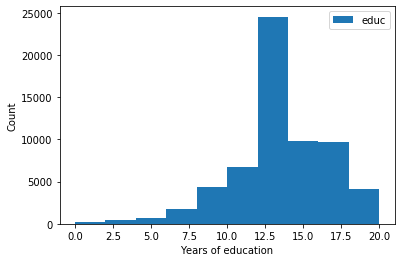

In [17]:
# Distribution of educ
educ = gss['educ']
plt.hist(educ.dropna(), label = 'educ')
plt.xlabel('Years of education')
plt.ylabel('Count')
plt.legend()
plt.show()

#### Extract education levels

Let's create Boolean Series to identify respondents with different levels of education.

In the U.S, 12 years of education usually means the respondent has completed high school (secondary education). A respondent with 14 years of education has probably completed an associate degree (two years of college); someone with 16 years has probably completed a bachelor's degree (four years of college).

* Complete the line that identifies respondents with associate degrees, that is, people with 14 or more years of education but less than 16.
* Complete the line that identifies respondents with 12 or fewer years of education.
* Confirm that the mean of high is the fraction we computed in the previous exercise, about 53%.

In [18]:
# Select educ
educ = gss['educ']

# Bachelor's degree
bach = (educ >= 16)

# Associate degree
assc = (educ >= 14) & (educ < 16)

# High school (12 or fewer years of education)
high = (educ <= 12)
print(high.mean())

0.5308807991547402


#### Distribution of income

In many datasets, the distribution of income is approximately lognormal, which means that the logarithms of the incomes fit a normal distribution. We'll see whether that's true for the GSS data. As a first step, you'll compute the mean and standard deviation of the log of incomes using NumPy's np.log10() function.

Then, you'll use the computed mean and standard deviation to make a norm object using the scipy.stats.norm() function.

* Extract 'realinc' from gss and compute its logarithm using np.log10().
* Compute the mean and standard deviation of the result.
* Make a norm object by passing the computed mean and standard deviation to norm().

In [19]:
# Extract realinc and compute its log
from scipy.stats import norm
income = gss['realinc']
log_income = np.log10(income)

# Compute mean and standard deviation
mean = np.mean(log_income)
std = np.std(log_income)
print(mean, std)

# Make a norm object
from scipy.stats import norm
dist = norm(mean,std)

4.371148677933652 0.4290043733010077


### Chapter 03 Exploring relationships


__dataset__

Random subsample of 10 000 rows

#### Reading the data

In [20]:
file = 'brfss.hdf5'
dir = '.\\datasets\\' + file

brfss = pd.read_hdf(dir ,'brfss')

#### Scatter plot

Now let's make a scatterplot of weight versus age. To make the code run faster, I've selected only the first 1000 rows from the brfss DataFrame.

weight and age have already been extracted for you. Your job is to use plt.plot() to make a scatter plot.

* Make a scatter plot of weight and age with format string 'o' and alpha=0.1.

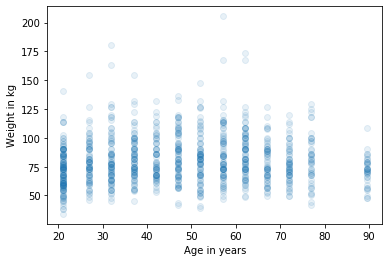

In [21]:
# Select the first 1000 respondents
brfss = brfss[:1000]

# Extract age and weight
age = brfss['AGE']
weight = brfss['WTKG3']

# Make a scatter plot
plt.plot(age,weight,'o', alpha = 0.1)

plt.xlabel('Age in years')
plt.ylabel('Weight in kg')

plt.show()

#### Jittering

In the previous exercise, the ages fall in columns because they've been rounded into 5-year bins. If we jitter them, the scatter plot will show the relationship more clearly.

* Add random noise to age with mean 0 and standard deviation 2.5.
* Make a scatter plot between weight and age with marker size 5 and alpha=0.2. Be sure to also specify 'o'.

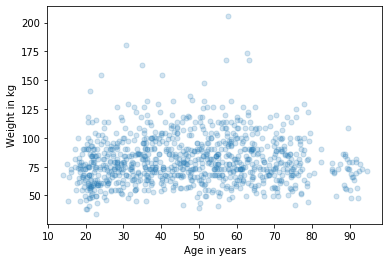

In [22]:
# Select the first 1000 respondents
brfss = brfss[:1000]

# Add jittering to age
age = brfss['AGE'] + np.random.normal(0, 2.5, size=len(brfss))
# Extract weight
weight = brfss['WTKG3']


# Make a scatter plot
plt.plot(age,weight, 'o',alpha = 0.2 , markersize = 5)

plt.xlabel('Age in years')
plt.ylabel('Weight in kg')
plt.show()


#### Visualizing relationships

#### Height and weight

Previously we looked at a scatter plot of height and weight, and saw that taller people tend to be heavier. Now let's take a closer look using a box plot. The brfss DataFrame contains a variable '_HTMG10' that represents height in centimeters, binned into 10 cm groups.



* Fill in the parameters of .boxplot() to plot the distribution of weight ('WTKG3') in each height ('_HTMG10') group. Specify whis=10, just as was done in the video.
* Add a line to plot the y-axis on a logarithmic scale.

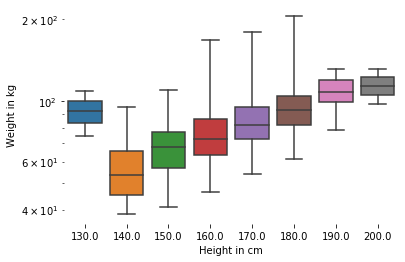

In [23]:
# Drop rows with missing data
data = brfss.dropna(subset=['_HTMG10', 'WTKG3'])

# Make a box plot
sns.boxplot(x = '_HTMG10' , y ='WTKG3' , data = data,whis = 10)

# Plot the y-axis on a log scale
plt.yscale('log')

# Remove unneeded lines and label axes
sns.despine(left=True, bottom=True)
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()

#### Income and height

Let's now use a violin plot to visualize the relationship between income and height.

* Create a violin plot to plot the distribution of height ('HTM4') in each income ('INCOME2') group. Specify inner=None to simplify the plot.


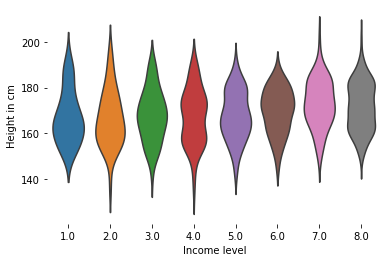

In [24]:
# Drop rows with missing data
data = brfss.dropna(subset=['INCOME2', 'HTM4'])

# Make a violin plot
sns.violinplot(x = 'INCOME2', y = 'HTM4',data = data, inner = None)

# Remove unneeded lines and label axes
sns.despine(left=True, bottom=True)
plt.xlabel('Income level')
plt.ylabel('Height in cm')
plt.show()

### Correlation

The purpose of the BRFSS is to explore health risk factors, so it includes questions about diet. The variable '_VEGESU1' represents the number of servings of vegetables respondents reported eating per day.

Let's see how this variable relates to age and income.

* From the brfss DataFrame, select the columns 'AGE', 'INCOME2', and '_VEGESU1'.
* Compute the correlation matrix for these variables.

In [25]:
# Select columns
columns = ['AGE', 'INCOME2', '_VEGESU1']
subset = brfss[columns]

# Compute the correlation matrix
print(subset.corr())

               AGE   INCOME2  _VEGESU1
AGE       1.000000 -0.014141 -0.021548
INCOME2  -0.014141  1.000000  0.115264
_VEGESU1 -0.021548  0.115264  1.000000


#### Simple regression


#### Income and vegetables

As we saw in a previous exercise, the variable '_VEGESU1' represents the number of vegetable servings respondents reported eating per day.

Let's estimate the slope of the relationship between vegetable consumption and income.

* Extract the columns 'INCOME2' and '_VEGESU1' from subset into xs and ys respectively.
* Compute the simple linear regression of these variables.

In [26]:
from scipy.stats import linregress

# Extract the variables
subset = brfss.dropna(subset=['INCOME2', '_VEGESU1'])
xs = subset['INCOME2']
ys = subset['_VEGESU1']

# Compute the linear regression
res = linregress(xs,ys)
print(res)

LinregressResult(slope=0.07000027412424817, intercept=1.5413758521321232, rvalue=0.11526352353306703, pvalue=0.0015115444024927935, stderr=0.021983967667553426)


#### Fit a line
Continuing from the previous exercise:

Assume that xs and ys contain income codes and daily vegetable consumption, respectively, and

res contains the results of a simple linear regression of ys onto xs.

Now, you're going to compute the line of best fit. NumPy has been imported for you as np.

* Set fx to the minimum and maximum of xs, stored in a NumPy array.
* Set fy to the points on the fitted line that correspond to the fx.

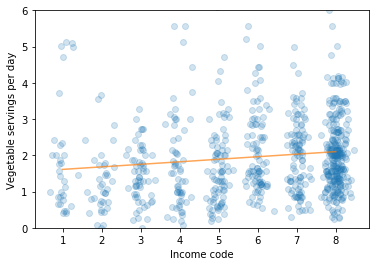

In [27]:
# Plot the scatter plot
%matplotlib inline
plt.clf()
x_jitter = xs + np.random.normal(0, 0.15, len(xs))
plt.plot(x_jitter, ys, 'o', alpha=0.2)

# Plot the line of best fit
fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx, fy, '-', alpha=0.7)

plt.xlabel('Income code')
plt.ylabel('Vegetable servings per day')
plt.ylim([0, 6])
plt.show()

### Chapter 04

#### Limits of simple regression


#### Mutiple regression

In [28]:
import statsmodels.formula.api as smf

In [29]:
results = smf.ols('INCOME2 ~ _VEGESU1', data = brfss).fit()

In [30]:
params = results.params

In [31]:
params

Intercept    5.579385
_VEGESU1     0.189795
dtype: float64

##### Using StatsModels

Let's run the same regression using SciPy and StatsModels, and confirm we get the same results.

* Compute the regression of '_VEGESU1' as a function of 'INCOME2' using SciPy's linregress().
* Compute the regression of '_VEGESU1' as a function of 'INCOME2' using StatsModels' smf.ols().

In [32]:
from scipy.stats import linregress
import statsmodels.formula.api as smf

# Run regression with linregress
subset = brfss.dropna(subset=['INCOME2', '_VEGESU1'])
xs = subset['INCOME2']
ys = subset['_VEGESU1']
res = linregress(xs,ys)
print(res)

# Run regression with StatsModels
results = smf.ols('_VEGESU1 ~ INCOME2', data = brfss).fit()
print(results.params)

LinregressResult(slope=0.07000027412424817, intercept=1.5413758521321232, rvalue=0.11526352353306703, pvalue=0.0015115444024927935, stderr=0.021983967667553426)
Intercept    1.541376
INCOME2      0.070000
dtype: float64


#### Multiple regression

In [33]:
#Adding age
results = smf.ols('realinc ~ educ + age', data = gss).fit()
results.params

Intercept   -16117.275684
educ          3655.166921
age             83.731804
dtype: float64

In [34]:
# Relationship between Income and Age
grouped = gss.groupby('age')

In [35]:
mean_income_by_age = grouped['realinc'].mean()

Text(0, 0.5, 'Income (1986 $)')

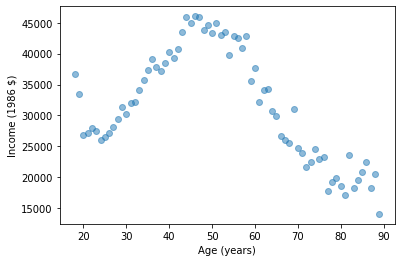

In [45]:
%matplotlib inline
plt.plot(mean_income_by_age, 'o', alpha = 0.5)
plt.xlabel('Age (years)')
plt.ylabel('Income (1986 $)')

In [36]:
## Adding cuadratic term
gss['age2'] = gss['age']**2
model_cuadratic = smf.ols('realinc ~ educ + age + age2', data = gss)
result_model = model_cuadratic.fit()
result_model.params

Intercept   -48058.679679
educ          3442.447178
age           1748.232631
age2           -17.437552
dtype: float64

#### Plot income and education

To get a closer look at the relationship between income and education, let's use the variable 'educ' to group the data, then plot mean income in each group.

Here, the GSS dataset has been pre-loaded into a DataFrame called gss.

* Group gss by 'educ'. Store the result in grouped.
* From grouped, extract 'realinc' and compute the mean.
* Plot mean_income_by_educ as a scatter plot. Specify 'o' and alpha=0.5.

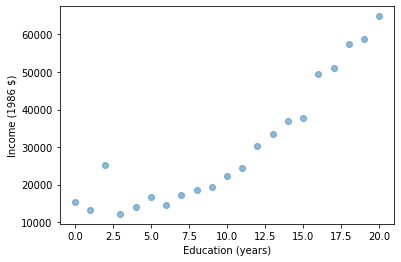

In [37]:
# Group by educ
grouped = gss.groupby('educ')

# Compute mean income in each group
mean_income_by_educ = grouped['realinc'].mean()

# Plot mean income as a scatter plot
plt.plot(mean_income_by_educ, 'o', alpha = 0.5)

# Label the axes
plt.xlabel('Education (years)')
plt.ylabel('Income (1986 $)')
plt.show()

#### Non-linear model of education

The graph in the previous exercise suggests that the relationship between income and education is non-linear. So let's try fitting a non-linear model.

* Add a column named 'educ2' to the gss DataFrame; it should contain the values from 'educ' squared.
* Run a regression model that uses 'educ', 'educ2', 'age', and 'age2' to predict 'realinc'.

In [38]:
import statsmodels.formula.api as smf

# Add a new column with educ squared
gss['educ2'] = gss['educ']**2

# Run a regression model with educ, educ2, age, and age2
results = smf.ols('realinc ~ educ + educ2 + age + age2', data = gss).fit()

# Print the estimated parameters
print(results.params)

Intercept   -23241.884034
educ          -528.309369
educ2          159.966740
age           1696.717149
age2           -17.196984
dtype: float64


#### Visualizing regression results

#### Generating predictions

In [42]:
df = pd.DataFrame()
df['age'] = np.linspace(18, 85)
df['age2'] = df['age']**2

df['educ'] = 12
df['educ2'] = df['educ']**2

In [43]:
pred12 = results.predict(df) 

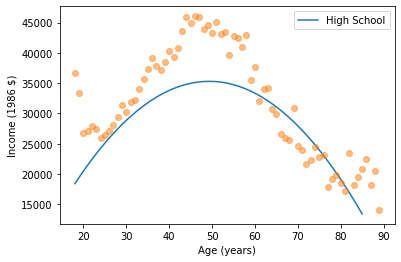

In [47]:
plt.plot(df['age'], pred12, label = 'High School')
plt.plot(mean_income_by_age, 'o', alpha = 0.5)

plt.xlabel('Age (years)')
plt.ylabel('Income (1986 $)')
plt.legend()
plt.show()

#### Levels of education

In [50]:
df['educ'] = 14
df['educ2'] = df['educ']**2

pred14 = results.predict(df) 

df['educ'] = 16
df['educ2'] = df['educ']**2

pred16 = results.predict(df) 

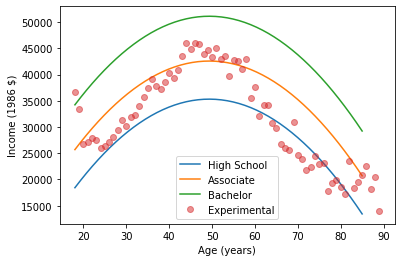

In [52]:
plt.plot(df['age'], pred12, label = 'High School')
plt.plot(df['age'], pred14, label = 'Associate')
plt.plot(df['age'], pred16, label = 'Bachelor')
plt.plot(mean_income_by_age, 'o', alpha = 0.5, label = 'Experimental')

plt.xlabel('Age (years)')
plt.ylabel('Income (1986 $)')
plt.legend()
plt.show()

#### Making predictions

At this point, we have a model that predicts income using age, education, and sex.

Let's see what it predicts for different levels of education, holding age constant.

* Using np.linspace(), add a variable named 'educ' to df with a range of values from 0 to 20.
* Add a variable named 'age' with the constant value 30.
* Use df to generate predicted income as a function of education.

In [55]:
# Run a regression model with educ, educ2, age, and age2
results = smf.ols('realinc ~ educ + educ2 + age + age2', data=gss).fit()

# Make the DataFrame
df = pd.DataFrame()
df['educ'] = np.linspace(0,20)
df['age'] = 30
df['educ2'] = df['educ']**2
df['age2'] = df['age']**2

# Generate and plot the predictions
pred = results.predict(df)
print(pred.head())

0    12182.344976
1    11993.358518
2    11857.672098
3    11775.285717
4    11746.199374
dtype: float64


#### Visualizing predictions

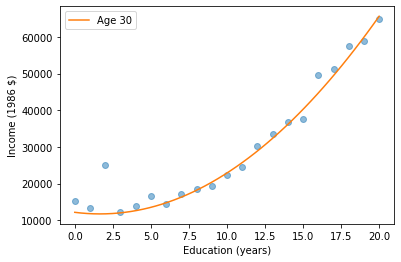

In [57]:
# Plot mean income in each age group
%matplotlib inline
plt.clf()
grouped = gss.groupby('educ')
mean_income_by_educ = grouped['realinc'].mean()
plt.plot(mean_income_by_educ, 'o', alpha = 0.5)

# Plot the predictions
pred = results.predict(df)
plt.plot(df['educ'], pred, label='Age 30')

# Label axes
plt.xlabel('Education (years)')
plt.ylabel('Income (1986 $)')
plt.legend()
plt.show()

#### Logictic Regression

In [58]:
#Including categorical variable in Statsmodels

formula = 'realinc ~ educ + educ2 + age + age2 + C(sex)'
results = smf.ols(formula, data = gss).fit()
results.params

Intercept     -22369.453641
C(sex)[T.2]    -4156.113865
educ            -310.247419
educ2            150.514091
age             1703.047502
age2             -17.238711
dtype: float64

#### Bolean variables

General Social Survey: Would you favor or oppose which would require a person to obtain a police permit before she or he could buy a gun

In [60]:
#1 : yes
#2 : no    
gss['gunlaw'].value_counts()

1.0    30918
2.0     9632
Name: gunlaw, dtype: int64

In [61]:
#Recode for logistic regression
gss['gunlaw'].replace([2],[0], inplace = True)

In [62]:
gss['gunlaw'].value_counts()

1.0    30918
0.0     9632
Name: gunlaw, dtype: int64

In [63]:
formula = 'gunlaw ~ age + age2 + educ + educ2 + C(sex)'
results = smf.logit(formula, data = gss).fit()
results.params

Optimization terminated successfully.
         Current function value: 0.533674
         Iterations 6


Intercept      1.653862
C(sex)[T.2]    0.757249
age           -0.018849
age2           0.000189
educ          -0.124373
educ2          0.006653
dtype: float64

#### Generating predictions

In [67]:
df = pd.DataFrame()
df['age'] = np.linspace(18,89)
df['educ'] = 12

df['educ2'] = df['educ']**2
df['age2'] = df['age']**2

df['sex'] = 1
pred1 = results.predict(df)

df['sex'] = 2
pred2 = results.predict(df)



#### Vizualization results

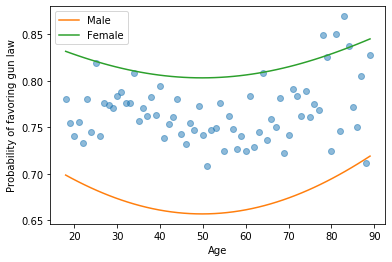

In [72]:
grouped  = gss.groupby('age')
favor_by_age = grouped['gunlaw'].mean()
plt.plot(favor_by_age, 'o', alpha = 0.5)
plt.plot(df['age'], pred1, label = 'Male')
plt.plot(df['age'], pred2, label = 'Female')

plt.xlabel('Age')
plt.ylabel('Probability of favoring gun law')
plt.legend()
plt.savefig('Control guns')

#### Predicting a binary variable

Let's use logistic regression to predict a binary variable. Specifically, we'll use age, sex, and education level to predict support for legalizing cannabis (marijuana) in the U.S.

In the GSS dataset, the variable grass records the answer to the question "Do you think the use of marijuana should be made legal or not?"

* Fill in the parameters of smf.logit() to predict grass using the variables age, age2, educ, and educ2, along with sex as a categorical variable.

In [74]:
# Recode grass
gss['grass'].replace(2, 0, inplace=True)

# Run logistic regression
results = smf.logit('grass ~ age + age2 + educ + educ2 + C(sex)', data = gss).fit()
results.params

Optimization terminated successfully.
         Current function value: 0.588510
         Iterations 6


Intercept     -1.685223
C(sex)[T.2]   -0.384611
age           -0.034756
age2           0.000192
educ           0.221860
educ2         -0.004163
dtype: float64

* Add a column called educ and set it to 12 years; then compute a second column, educ2, which is the square of educ.

In [75]:
# Make a DataFrame with a range of ages
df = pd.DataFrame()
df['age'] = np.linspace(18, 89)
df['age2'] = df['age']**2

# Set the education level to 12
df['educ'] = 12
df['educ2'] = df['educ']**2

* Generate separate predictions for men and women.

In [76]:
# Generate predictions for men and women
df['sex'] = 1
pred1 = results.predict(df)

df['sex'] = 2
pred2 = results.predict(df)

* Fill in the missing code to compute the mean of 'grass' for each age group, and then the arguments of plt.plot() to plot pred2 versus df['age'] with the label 'Female'.

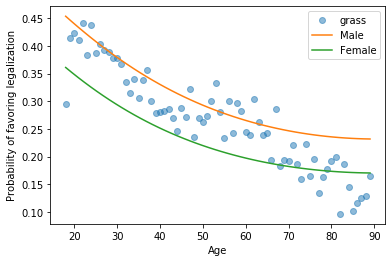

In [82]:
plt.clf()
grouped = gss.groupby('age')
favor_by_age = grouped['grass'].mean()

plt.plot(favor_by_age, 'o', alpha=0.5, label = 'grass')

plt.plot(df['age'], pred1, label='Male')
plt.plot(df['age'], pred2, label='Female')

plt.xlabel('Age')
plt.ylabel('Probability of favoring legalization')
plt.legend()
plt.savefig('cannabis')